In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install lime

     -------------------------------------- 275.7/275.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=9b34744b6d680f01b5671a36f2e022d68ec335c038c57d8366b4d4576c820330
  Stored in directory: c:\users\302201\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [3]:
train = pd.read_csv('Train-1542865627584.csv');

In [4]:
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [5]:
col= "Provider"

In [6]:
v=train.groupby("PotentialFraud")


In [7]:
outpatient= pd.read_csv("Train_Outpatientdata-1542865627584.csv")
outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [8]:
outpatient.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


In [9]:
inpatient= pd.read_csv("Train_Inpatientdata-1542865627584.csv")
inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [10]:

def isCategorical(col):
    unis = np.unique(col)
    if len(unis)<0.02*len(col):
        return True
    return False


def getColumnTypes(cols):
    Categorical=[]
    Numerical = []
    Object = []
    for i in range(len(cols)):
        if cols["type"][i]=='categorical':
            Categorical.append(cols['column_name'][i])
        elif cols["type"][i]=='numerical':
            Numerical.append(cols['column_name'][i])
        else:
            Object.append(cols['column_name'][i])
    return Categorical, Numerical, Object

def isNumerical(col):
    return is_numeric_dtype(col)

def genMetaData(df):
    col = df.columns
    ColumnType = [] 
    Categorical = []
    Object = []
    Numerical = []
    for i in range(len(col)):
        if isCategorical(df[col[i]]):
            ColumnType.append((col[i],"categorical"))
            Categorical.append(col[i])
        
        elif is_numeric_dtype(df[col[i]]):
            ColumnType.append((col[i],"numerical"))
            Numerical.append(col[i])
        
        else:
            ColumnType.append((col[i],"object"))
            Object.append(col[i])

    return ColumnType

def makeMapDict(col): 
    uniqueVals = list(np.unique(col))
    uniqueVals.sort()
    dict_ = {uniqueVals[i]: i for i in range(len(uniqueVals))}
    return dict_

def mapunique(df, colName):
    dict_ = makeMapDict(df[colName])
    cat = np.unique(df[colName])
    df[colName] =  df[colName].map(dict_)
    return cat 


def newDF(df, columns2Drop):
    newDF = df.drop(columns2Drop, axis = 'columns')
    return newDF

def convert_df(df):
    return df.to_csv().encode('utf-8')



In [11]:
isCategorical(outpatient["InscClaimAmtReimbursed"])

True

In [12]:
len(outpatient["InscClaimAmtReimbursed"]) * 0.2

103547.40000000001

In [13]:
unis = np.unique(outpatient["InscClaimAmtReimbursed"])
len(unis)

342

In [14]:
df_analysis = pd.read_csv('main_data.csv')
df_visual = df_analysis.copy()
cols = pd.read_csv('column_type_desc.csv')
Categorical,Numerical,Object = getColumnTypes(cols)
cat_groups = {}
unique_Category_val={}

for i in range(len(Categorical)):
        unique_Category_val = {Categorical[i]: mapunique(df_analysis, Categorical[i])}
        cat_groups = {Categorical[i]: df_visual.groupby(Categorical[i])}

FileNotFoundError: [Errno 2] No such file or directory: 'main_data.csv'

In [15]:
Categorical

NameError: name 'Categorical' is not defined

In [ ]:
unique_Category_val1 = {Categorical[1]: mapunique(df_analysis, Categorical[1])}

In [16]:
makeMapDict(outpatient["Provider"])

{'PRV51001': 0,
 'PRV51003': 1,
 'PRV51004': 2,
 'PRV51005': 3,
 'PRV51007': 4,
 'PRV51008': 5,
 'PRV51011': 6,
 'PRV51012': 7,
 'PRV51013': 8,
 'PRV51014': 9,
 'PRV51015': 10,
 'PRV51016': 11,
 'PRV51017': 12,
 'PRV51021': 13,
 'PRV51023': 14,
 'PRV51024': 15,
 'PRV51025': 16,
 'PRV51026': 17,
 'PRV51027': 18,
 'PRV51029': 19,
 'PRV51030': 20,
 'PRV51031': 21,
 'PRV51032': 22,
 'PRV51035': 23,
 'PRV51036': 24,
 'PRV51037': 25,
 'PRV51038': 26,
 'PRV51040': 27,
 'PRV51041': 28,
 'PRV51042': 29,
 'PRV51043': 30,
 'PRV51044': 31,
 'PRV51045': 32,
 'PRV51046': 33,
 'PRV51047': 34,
 'PRV51048': 35,
 'PRV51049': 36,
 'PRV51052': 37,
 'PRV51054': 38,
 'PRV51055': 39,
 'PRV51056': 40,
 'PRV51057': 41,
 'PRV51058': 42,
 'PRV51059': 43,
 'PRV51060': 44,
 'PRV51061': 45,
 'PRV51062': 46,
 'PRV51063': 47,
 'PRV51064': 48,
 'PRV51065': 49,
 'PRV51066': 50,
 'PRV51067': 51,
 'PRV51068': 52,
 'PRV51070': 53,
 'PRV51071': 54,
 'PRV51072': 55,
 'PRV51074': 56,
 'PRV51075': 57,
 'PRV51076': 58,
 'PRV51

 category = st.selectbox("Select Category ", Categorical + Object)

        sizes = (df_visual[category].value_counts()/df_visual[category].count())

        labels = sizes.keys()

        maxIndex = np.argmax(np.array(sizes))
        explode = [0]*len(labels)
        explode[int(maxIndex)] = 0.1
        explode = tuple(explode)
        
        fig1, ax1 = plt.subplots()
        ax1.pie(sizes,explode = explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=0)
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax1.set_title('Distribution for Categorical Column - ' + (str)(category))
        st.pyplot(fig1)
        
        corr = df_analysis.corr(method='pearson')
        
        fig2, ax2 = plt.subplots()
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        # Colors
        cmap = sns.diverging_palette(240, 10, as_cmap=True)
        sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, center=0,ax=ax2)
        ax2.set_title("Correlation Matrix")
        st.pyplot(fig2)
        
        
        categoryObject=st.selectbox("Select " + (str)(category),unique_Category_val[category])
        st.write(cat_groups[category].get_group(categoryObject).describe())
        colName = st.selectbox("Select Column ",Numerical)

        st.bar_chart(cat_groups[category].get_group(categoryObject)[colName])

In [17]:
beneficiary= pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


## Exploratory Data Analysis

Looking for the most common procedure codes which are applied for the fradulent and non fradulent services to see any specific pattern

### Inpatient

In [18]:
df_procedures1 =  pd.DataFrame(columns = ['Procedures'])
df_procedures1['Procedures'] = pd.concat([inpatient["ClmProcedureCode_1"], inpatient["ClmProcedureCode_2"], inpatient["ClmProcedureCode_3"], inpatient["ClmProcedureCode_4"], inpatient["ClmProcedureCode_5"], inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
df_procedures1['Procedures'].head(10)

1     7092.0
3      331.0
4     3893.0
5      863.0
6     4576.0
7     9904.0
9     3612.0
10    9672.0
12    9904.0
14    9671.0
Name: Procedures, dtype: float64

In [19]:
df_procedures1.shape

(29692, 1)

In [20]:
inpatient.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [21]:
grouped_procedure_df = df_procedures1['Procedures'].value_counts()
grouped_procedure_df

4019.0    1953
9904.0    1137
2724.0    1047
8154.0    1021
66.0       894
          ... 
5689.0       1
8853.0       1
8134.0       1
9031.0       1
3343.0       1
Name: Procedures, Length: 1321, dtype: int64

In [22]:
df_diagnosis = pd.DataFrame(columns = ['Diagnosis'])
df_diagnosis['Diagnosis'] = pd.concat([inpatient["ClmDiagnosisCode_1"], inpatient["ClmDiagnosisCode_2"], inpatient["ClmDiagnosisCode_3"], inpatient["ClmDiagnosisCode_4"], inpatient["ClmDiagnosisCode_5"], inpatient["ClmDiagnosisCode_6"], inpatient["ClmDiagnosisCode_7"], inpatient["ClmDiagnosisCode_8"], inpatient["ClmDiagnosisCode_9"], inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
df_diagnosis['Diagnosis'].head(10)

0     1970
1     6186
2    29623
3    43491
4      042
5     1745
6     1536
7    56212
8    42823
9    41041
Name: Diagnosis, dtype: object

In [23]:
df_diagnosis.shape

(327328, 1)

In [24]:
grouped_diagnosis_df = df_diagnosis['Diagnosis'].value_counts()
grouped_diagnosis_df

4019     14153
2724      7340
25000     7334
41401     6442
4280      6190
         ...  
20213        1
34710        1
37855        1
9711         1
V6141        1
Name: Diagnosis, Length: 4716, dtype: int64

In [25]:
grouped_diagnosis_df.head()

4019     14153
2724      7340
25000     7334
41401     6442
4280      6190
Name: Diagnosis, dtype: int64

In [26]:
grouped_procedure_df1 = grouped_procedure_df.to_frame()
grouped_procedure_df1

,Procedures
4019.0,1953
9904.0,1137
2724.0,1047
8154.0,1021
66.0,894
...,...
5689.0,1
8853.0,1
8134.0,1
9031.0,1


In [27]:
grouped_procedure_df1.columns = ['count']
grouped_procedure_df1

,count
4019.0,1953
9904.0,1137
2724.0,1047
8154.0,1021
66.0,894
...,...
5689.0,1
8853.0,1
8134.0,1
9031.0,1


In [28]:
grouped_procedure_df1['Procedure'] = grouped_procedure_df1.index
grouped_procedure_df1

,count,Procedure
4019.0,1953,4019.0
9904.0,1137,9904.0
2724.0,1047,2724.0
8154.0,1021,8154.0
66.0,894,66.0
...,...,...
5689.0,1,5689.0
8853.0,1,8853.0
8134.0,1,8134.0
9031.0,1,9031.0


In [29]:
grouped_procedure_df1['Percentage'] = (grouped_procedure_df1['count']/sum(grouped_procedure_df1['count']))*100
grouped_procedure_df1['Percentage']

4019.0    6.577529
9904.0    3.829314
2724.0    3.526202
8154.0    3.438637
66.0      3.010912
            ...   
5689.0    0.003368
8853.0    0.003368
8134.0    0.003368
9031.0    0.003368
3343.0    0.003368
Name: Percentage, Length: 1321, dtype: float64

In [30]:
grouped_diagnosis_df = grouped_diagnosis_df.to_frame()
grouped_diagnosis_df.columns = ['count']
grouped_diagnosis_df['Diagnosis'] = grouped_diagnosis_df.index
grouped_diagnosis_df['Percentage'] = (grouped_diagnosis_df['count']/sum(grouped_diagnosis_df['count']))*100
grouped_diagnosis_df['Percentage']

4019     4.323798
2724     2.242399
25000    2.240566
41401    1.968057
4280     1.891070
           ...   
20213    0.000306
34710    0.000306
37855    0.000306
9711     0.000306
V6141    0.000306
Name: Percentage, Length: 4716, dtype: float64

In [31]:
# taking only top 20 

plot_procedure_df1 = grouped_procedure_df1.head(20)
plot_diagnosis_df1 = grouped_diagnosis_df.head(20)

C:\Users\302201\AppData\Local\Temp/ipykernel_5172/2503671377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_procedure_df1['Procedure'] = plot_procedure_df1['Procedure'].astype(str)


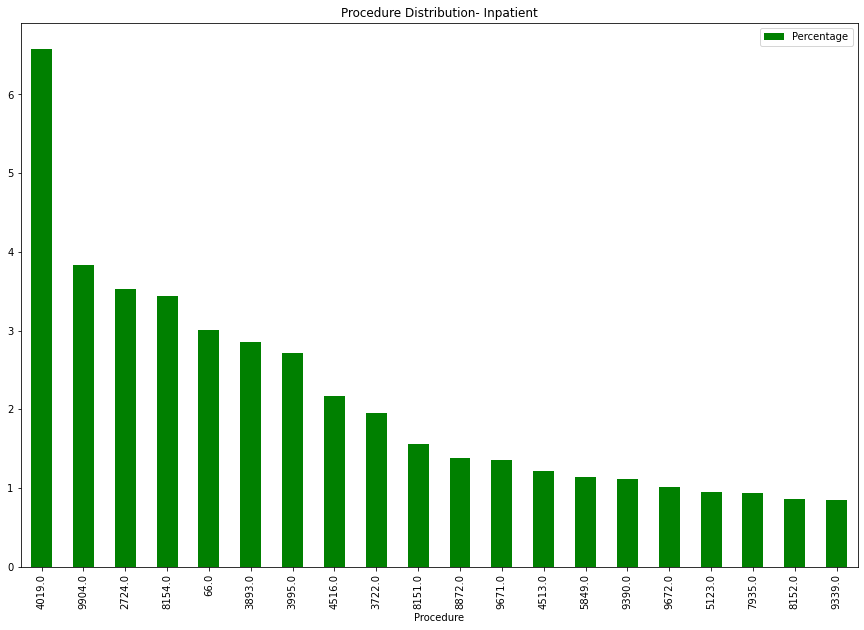

In [32]:
# Plotting the most commonly used diagnosis and procedures 
from matplotlib import pyplot as plt
plot_procedure_df1['Procedure'] = plot_procedure_df1['Procedure'].astype(str)
plot_procedure_df1.sort_values(by=['Percentage'])
plot_procedure_df1.plot(x ='Procedure', y='Percentage', kind='bar', color ='green',
                  title='Procedure Distribution- Inpatient', figsize=(15,10));

C:\Users\302201\AppData\Local\Temp/ipykernel_5172/2313010061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_diagnosis_df1['Diagnosis'] =  plot_diagnosis_df1['Diagnosis'].astype(str)


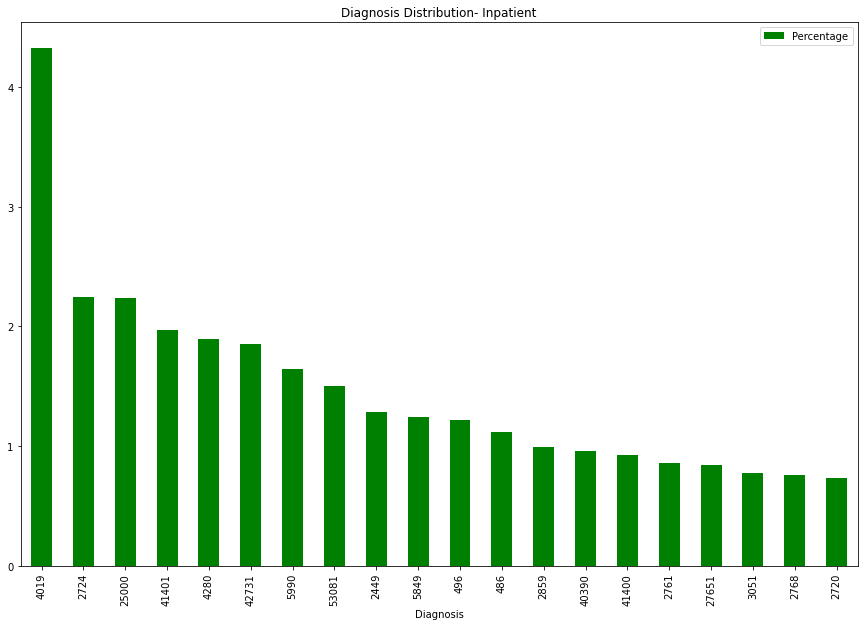

In [33]:
plot_diagnosis_df1['Diagnosis'] =  plot_diagnosis_df1['Diagnosis'].astype(str)
plot_diagnosis_df1.sort_values(by=['Percentage'])
plot_diagnosis_df1.plot(x ='Diagnosis', y='Percentage', kind='bar', color ='green',
                  title='Diagnosis Distribution- Inpatient', figsize=(15,10));

We see that for inpatient the most common procedure used is 4019, 9904, 2724 among others

We see that for inpatient the most common Diagnosis used is 4019, 2724,25000 among others

### Outpatient

In [34]:
df_procedures2 =  pd.DataFrame(columns = ['Procedures'])
df_procedures2['Procedures'] = pd.concat([outpatient["ClmProcedureCode_1"], outpatient["ClmProcedureCode_2"], outpatient["ClmProcedureCode_3"], outpatient["ClmProcedureCode_4"], outpatient["ClmProcedureCode_5"], outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
df_procedures2['Procedures'].head(10)

8167     9672.0
9326     4573.0
14740      66.0
30435      66.0
35839    5123.0
37710    5123.0
50003    9390.0
50435     239.0
51151    8154.0
51463    7939.0
Name: Procedures, dtype: float64

In [35]:
grouped_procedure_df2 = df_procedures2['Procedures'].value_counts()

In [36]:
df_diagnosis2 = pd.DataFrame(columns = ['Diagnosis'])
df_diagnosis2['Diagnosis'] = pd.concat([outpatient["ClmDiagnosisCode_1"], outpatient["ClmDiagnosisCode_2"], outpatient["ClmDiagnosisCode_3"], outpatient["ClmDiagnosisCode_4"], outpatient["ClmDiagnosisCode_5"], outpatient["ClmDiagnosisCode_6"], outpatient["ClmDiagnosisCode_7"],  outpatient["ClmDiagnosisCode_8"], outpatient["ClmDiagnosisCode_9"], outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
df_diagnosis2['Diagnosis'].head(10)
grouped_diagnosis_df2 = df_diagnosis2['Diagnosis'].value_counts()

In [37]:
grouped_procedure_df_op = grouped_procedure_df2.to_frame()
grouped_procedure_df_op.columns = ['count']
grouped_procedure_df_op['Procedure'] = grouped_procedure_df_op.index
grouped_procedure_df_op['Percentage'] = (grouped_procedure_df_op['count']/sum(grouped_procedure_df_op['count']))*100
grouped_procedure_df_op['Percentage']

9904.0    7.352941
4516.0    3.921569
3722.0    3.921569
66.0      3.431373
5123.0    3.431373
            ...   
5369.0    0.490196
7971.0    0.490196
4311.0    0.490196
4573.0    0.490196
4299.0    0.490196
Name: Percentage, Length: 104, dtype: float64

In [38]:
grouped_diagnosis_df_op = grouped_diagnosis_df2.to_frame()
grouped_diagnosis_df_op.columns = ['count']
grouped_diagnosis_df_op['Diagnosis'] = grouped_diagnosis_df_op.index
grouped_diagnosis_df_op['Percentage'] = (grouped_diagnosis_df_op['count']/sum(grouped_diagnosis_df_op['count']))*100
grouped_diagnosis_df_op['Percentage']

4019     4.647817
25000    2.218285
2724     2.100137
V5869    1.799853
4011     1.738895
           ...   
36354    0.000074
75558    0.000074
85252    0.000074
86510    0.000074
E8262    0.000074
Name: Percentage, Length: 10846, dtype: float64

In [39]:
# taking only top 20 

plot_procedure_df2 = grouped_procedure_df_op.head(20)
plot_diagnosis_df2 = grouped_diagnosis_df_op.head(20)

C:\Users\302201\AppData\Local\Temp/ipykernel_5172/4147850852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_procedure_df2['Procedure'] = plot_procedure_df2['Procedure'].astype(str)


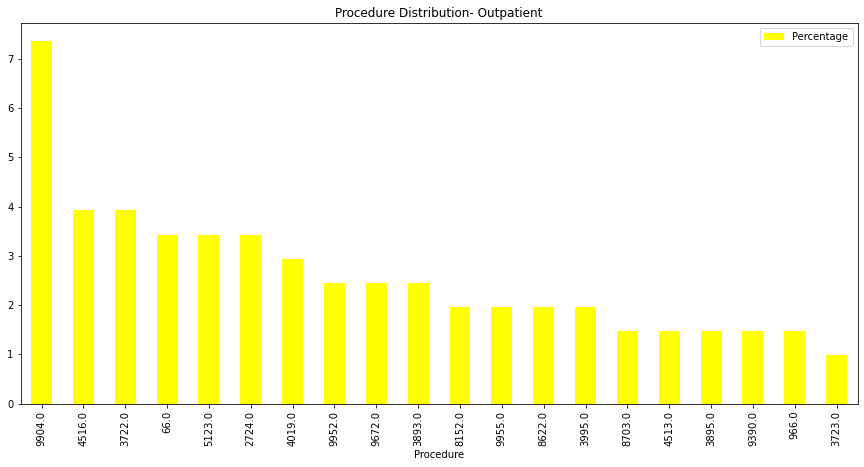

In [40]:
# Plotting the most commonly used diagnosis and procedures 
from matplotlib import pyplot as plt


plot_procedure_df2['Procedure'] = plot_procedure_df2['Procedure'].astype(str)
plot_procedure_df2.sort_values(by=['Percentage'])
plot_procedure_df2.plot(x ='Procedure', y='Percentage', kind='bar', color ='yellow',
                   title='Procedure Distribution- Outpatient', figsize=(15,7));

C:\Users\302201\AppData\Local\Temp/ipykernel_5172/198423258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_diagnosis_df2['Diagnosis'] = plot_diagnosis_df2['Diagnosis'].astype(str)


<AxesSubplot:title={'center':'Diagnosis Distribution- Outpatient'}, xlabel='Diagnosis'>

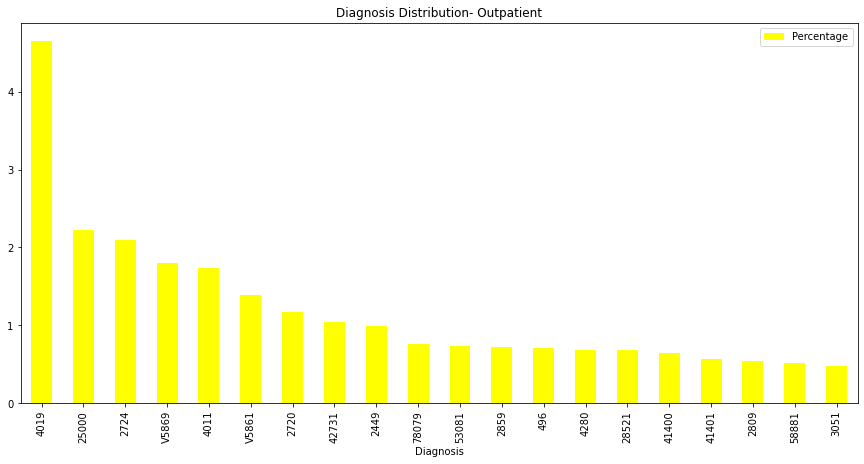

In [41]:
plot_diagnosis_df2['Diagnosis'] = plot_diagnosis_df2['Diagnosis'].astype(str)
plot_diagnosis_df2.sort_values(by=['Percentage'])
plot_diagnosis_df2.plot(x ='Diagnosis', y='Percentage', kind='bar', color ='yellow',
                   title='Diagnosis Distribution- Outpatient', figsize=(15,7))

We see a minor difference between the most used diagnosis and procedure codes between inpatient and outpatients

We see that for inpatient the most common procedure used is 9904, 3722, 4516 among others

We see that for inpatient the most common Diagnosis used is 4019, 25000, 2724 among others

<AxesSubplot:title={'center':'Distribution'}>

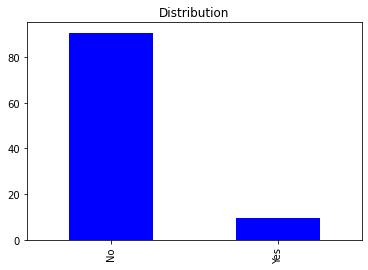

In [42]:
T_fraud = train['PotentialFraud'].value_counts()
grouped_train_df = T_fraud.to_frame()

grouped_train_df.columns = ['count']
grouped_train_df['Fraud'] = grouped_train_df.index
grouped_train_df['Percentage'] = (grouped_train_df['count']/sum(grouped_train_df['count']))*100
grouped_train_df['Percentage'].plot( kind='bar',color = "blue", title = 'Distribution')

### 2. What are the most common procedures and diagnosis codes performed by the potential fradulent providers

### Inpatient

In [43]:
Train_f =  pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
Train_f = train.loc[(train['PotentialFraud'] == 'Yes')]
Train_f

,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes
...,...,...
5307,PRV57642,Yes
5324,PRV57667,Yes
5329,PRV57672,Yes
5351,PRV57697,Yes


In [44]:
fraud_provider_ip_df = pd.merge(inpatient, Train_f, how='inner', on='Provider')
fraud_provider_ip_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23397,BENE142565,CLM37075,2009-02-05,2009-02-09,PRV55514,18000,PHY380221,PHY392672,NaN,2009-02-05,...,7265,7140,V1582,8151.0,NaN,NaN,NaN,NaN,NaN,Yes
23398,BENE105735,CLM52218,2009-05-22,2009-05-30,PRV56566,12000,PHY344703,PHY344703,NaN,2009-05-22,...,42789,2948,NaN,9671.0,NaN,NaN,NaN,NaN,NaN,Yes
23399,BENE135136,CLM60037,2009-07-17,2009-07-19,PRV55852,5000,PHY336944,NaN,NaN,2009-07-17,...,51889,0413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
23400,BENE135136,CLM70804,2009-10-05,2009-10-11,PRV55852,5000,PHY356585,PHY356585,NaN,2009-10-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [45]:
len(fraud_provider_ip_df)

23402

In [46]:
(len(fraud_provider_ip_df)/len(inpatient)) * 100

57.81983495577408

So we see there are 23402 admitted(inpatients) cases that the potential fradulent providers have interacted with at one point or the other during their services at the hospital. This is around 58% of the cases which we have in our inpatient data.

This means from our inpatient dataset for training we can have fradulent activities on more than half of them - 58% are potential fradulent encounters

### Outpatient

In [47]:
fraud_provider_op_df = pd.merge(outpatient, Train_f, how='inner', on='Provider')
fraud_provider_op_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189389,BENE144674,CLM478399,2009-07-19,2009-07-19,PRV56012,200,PHY349406,NaN,NaN,72401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7242,Yes
189390,BENE158989,CLM204673,2009-02-19,2009-02-20,PRV56012,90,PHY427933,NaN,NaN,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
189391,BENE111157,CLM82006,2008-12-15,2008-12-28,PRV51119,95580,PHY409901,PHY396304,PHY396304,0389,...,2762,9672.0,5119.0,NaN,NaN,NaN,NaN,865,51881,Yes
189392,BENE119614,CLM738809,2009-12-21,2009-12-21,PRV55472,90,PHY358448,NaN,NaN,V187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


In [48]:
len(fraud_provider_op_df)

189394

In [49]:
(len(fraud_provider_op_df)/len(outpatient))*100

36.58112130290089

So we see there are 189394 outpatient cases that the potential fradulent providers have interacted with at one point or the other during their services at the hospital. This is around 37% of the cases which we have in our inpatient data.

This means from our outpatient dataset for training we can have fradulent activities on around 38% of encounters

### Which were the most used procedure codes and diagnosis codes used by the potential fradulent providers

### Inpatient

In [50]:
df_procedures2 =  pd.DataFrame(columns = ['Procedures'])
df_procedures2['Procedures'] = pd.concat([fraud_provider_ip_df["ClmProcedureCode_1"], fraud_provider_ip_df["ClmProcedureCode_2"], fraud_provider_ip_df["ClmProcedureCode_3"], fraud_provider_ip_df["ClmProcedureCode_4"], fraud_provider_ip_df["ClmProcedureCode_5"], fraud_provider_ip_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
df_procedures2['Procedures'].head(10)

1     7769.0
2     9338.0
3     8154.0
4     8543.0
5     3327.0
7     3995.0
10    8741.0
11    4011.0
12    2181.0
13    3723.0
Name: Procedures, dtype: float64

In [51]:
grouped_F_procedure_df = df_procedures2['Procedures'].value_counts()
grouped_F_procedure_df

4019.0    1137
2724.0     641
9904.0     629
8154.0     614
66.0       535
          ... 
5341.0       1
8915.0       1
8829.0       1
4581.0       1
3343.0       1
Name: Procedures, Length: 1121, dtype: int64

In [52]:
grouped_F_procedure_df2 = grouped_F_procedure_df.to_frame()
grouped_F_procedure_df2.columns = ['count']
grouped_F_procedure_df2['Procedure'] = grouped_F_procedure_df2.index
grouped_F_procedure_df2['Percentage'] = (grouped_F_procedure_df2['count']/sum(grouped_F_procedure_df2['count']))*100
grouped_F_procedure_df2['Percentage']

4019.0    6.562771
2724.0    3.699856
9904.0    3.630592
8154.0    3.544012
66.0      3.088023
            ...   
5341.0    0.005772
8915.0    0.005772
8829.0    0.005772
4581.0    0.005772
3343.0    0.005772
Name: Percentage, Length: 1121, dtype: float64

In [53]:
df_diagnosis2 = pd.DataFrame(columns = ['Diagnosis'])
df_diagnosis2['Diagnosis'] = pd.concat([fraud_provider_ip_df["ClmDiagnosisCode_1"], fraud_provider_ip_df["ClmDiagnosisCode_2"], fraud_provider_ip_df["ClmDiagnosisCode_3"], fraud_provider_ip_df["ClmDiagnosisCode_4"], fraud_provider_ip_df["ClmDiagnosisCode_5"], fraud_provider_ip_df["ClmDiagnosisCode_6"], fraud_provider_ip_df["ClmDiagnosisCode_7"],  fraud_provider_ip_df["ClmDiagnosisCode_8"], fraud_provider_ip_df["ClmDiagnosisCode_9"], fraud_provider_ip_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
df_diagnosis2['Diagnosis'].head(10)

0     1970
1     4240
2    V5789
3    71535
4     2330
5     1623
6     3501
7    V5789
8     4280
9     5579
Name: Diagnosis, dtype: object

In [54]:
grouped_F_diagnosis_df = df_diagnosis2['Diagnosis'].value_counts()
grouped_F_diagnosis_df

4019     8116
25000    4248
2724     4245
41401    3744
4280     3585
         ... 
81101       1
9664        1
65811       1
9802        1
7284        1
Name: Diagnosis, Length: 4167, dtype: int64

In [55]:
grouped_F_diagnosis_df2 = grouped_F_diagnosis_df.to_frame()
grouped_F_diagnosis_df2.columns = ['count']
grouped_F_diagnosis_df2['Diagnosis'] = grouped_F_diagnosis_df2.index
grouped_F_diagnosis_df2['Percentage'] = (grouped_F_diagnosis_df2['count']/sum(grouped_F_diagnosis_df2['count']))*100
grouped_F_diagnosis_df2['Percentage']

4019     4.286718
25000    2.243713
2724     2.242129
41401    1.977510
4280     1.893529
           ...   
81101    0.000528
9664     0.000528
65811    0.000528
9802     0.000528
7284     0.000528
Name: Percentage, Length: 4167, dtype: float64

In [56]:
plot_F_procedure_df1 = grouped_F_procedure_df2.head(20)

plot_F_diagnosis_df1 = grouped_F_diagnosis_df2.head(20)

<AxesSubplot:xlabel='Procedure'>

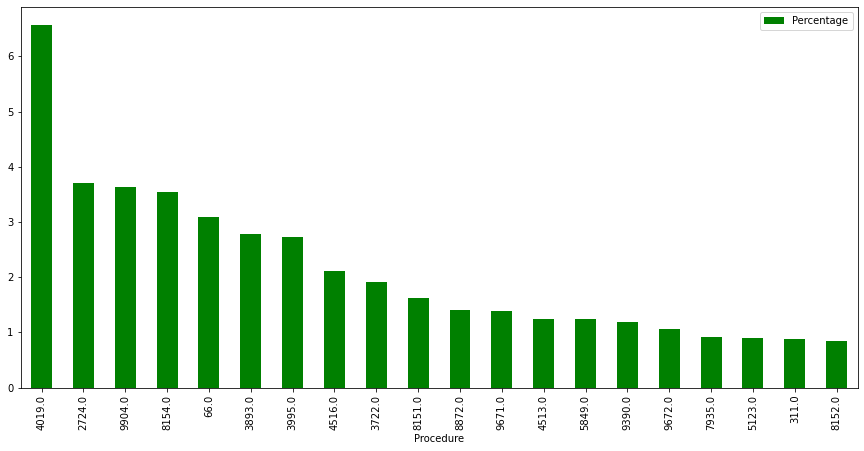

In [57]:
plot_F_procedure_df1.plot(x ='Procedure', y='Percentage', kind = 'bar', color ='g', figsize=(15,7))

<AxesSubplot:xlabel='Diagnosis'>

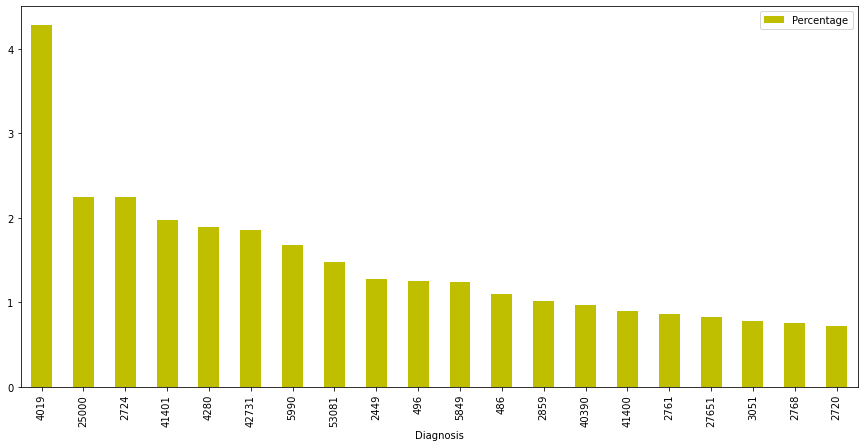

In [58]:
plot_F_diagnosis_df1.plot(x ='Diagnosis', y='Percentage', kind = 'bar', color ='y', figsize=(15,7))

In [59]:
df_procedures_op2 =  pd.DataFrame(columns = ['Procedures'])
df_procedures_op2['Procedures'] = pd.concat([fraud_provider_op_df["ClmProcedureCode_1"], fraud_provider_op_df["ClmProcedureCode_2"], fraud_provider_op_df["ClmProcedureCode_3"], fraud_provider_op_df["ClmProcedureCode_4"], fraud_provider_op_df["ClmProcedureCode_5"], fraud_provider_op_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()
df_procedures_op2['Procedures'].head(10)

2340     3723.0
5843     8703.0
6666     9904.0
6832     4573.0
11110    8154.0
14060      66.0
15283    3772.0
18162     966.0
19199    4516.0
21222    4311.0
Name: Procedures, dtype: float64

In [60]:
grouped_F_procedure_op_df = df_procedures_op2['Procedures'].value_counts()
grouped_F_procedure_op_df.head()

9904.0    5
4516.0    5
66.0      4
9390.0    3
5123.0    3
Name: Procedures, dtype: int64

In [61]:
grouped_F_procedure_opdf2 = grouped_F_procedure_op_df.to_frame()
grouped_F_procedure_opdf2.columns = ['count']
grouped_F_procedure_opdf2['Procedure'] = grouped_F_procedure_opdf2.index
grouped_F_procedure_opdf2['Percentage'] = (grouped_F_procedure_opdf2['count']/sum(grouped_F_procedure_opdf2['count']))*100
grouped_F_procedure_opdf2['Percentage'].head()

9904.0    5.555556
4516.0    5.555556
66.0      4.444444
9390.0    3.333333
5123.0    3.333333
Name: Percentage, dtype: float64

In [62]:
df_diagnosis_op2 = pd.DataFrame(columns = ['Diagnosis'])
df_diagnosis_op2['Diagnosis'] = pd.concat([fraud_provider_op_df["ClmDiagnosisCode_1"], fraud_provider_op_df["ClmDiagnosisCode_2"], fraud_provider_op_df["ClmDiagnosisCode_3"], fraud_provider_op_df["ClmDiagnosisCode_4"], fraud_provider_op_df["ClmDiagnosisCode_5"], fraud_provider_op_df["ClmDiagnosisCode_6"], fraud_provider_op_df["ClmDiagnosisCode_7"],  fraud_provider_op_df["ClmDiagnosisCode_8"], fraud_provider_op_df["ClmDiagnosisCode_9"], fraud_provider_op_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()
df_diagnosis_op2['Diagnosis'].head()

0    78943
1    71988
2    82382
3    20381
4    V6546
Name: Diagnosis, dtype: object

In [63]:
grouped_F_diagnosis_op_df = df_diagnosis2['Diagnosis'].value_counts()
grouped_F_diagnosis_op_df.head()

4019     8116
25000    4248
2724     4245
41401    3744
4280     3585
Name: Diagnosis, dtype: int64

In [64]:
grouped_F_diagnosis_opdf2 = grouped_F_diagnosis_op_df.to_frame()
grouped_F_diagnosis_opdf2.columns = ['count']
grouped_F_diagnosis_opdf2['Diagnosis'] = grouped_F_diagnosis_opdf2.index
grouped_F_diagnosis_opdf2['Percentage'] = (grouped_F_diagnosis_opdf2['count']/sum(grouped_F_diagnosis_opdf2['count']))*100
grouped_F_diagnosis_opdf2['Percentage'].head()

4019     4.286718
25000    2.243713
2724     2.242129
41401    1.977510
4280     1.893529
Name: Percentage, dtype: float64

In [65]:
plot_F_procedure_opdf1 = grouped_F_procedure_opdf2.head(20)

plot_F_diagnosis_opdf1 = grouped_F_diagnosis_opdf2.head(20)

<AxesSubplot:xlabel='Procedure'>

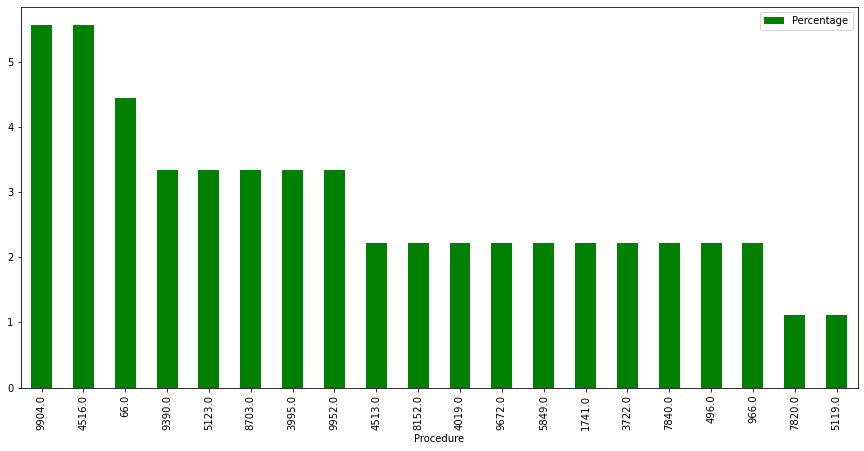

In [66]:
plot_F_procedure_opdf1.plot(x ='Procedure', y='Percentage', kind = 'bar', color ='g', figsize=(15,7))

<AxesSubplot:xlabel='Diagnosis'>

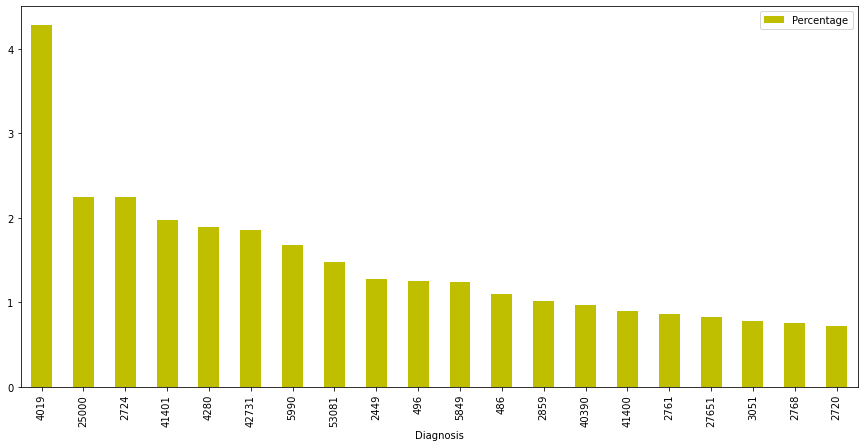

In [67]:
plot_F_diagnosis_opdf1.plot(x ='Diagnosis', y='Percentage', kind = 'bar', color ='y', figsize=(15,7))

### 4.Which states/localities have the highest number of potential frauds

In [68]:
beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [69]:
fraud_beneficiary_ip_op_df = pd.merge(beneficiary, fraud_provider_ip_df, how='inner', on='BeneID')
fraud_beneficiary_ip_op_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE11017,1940-06-01,NaN,2,1,0,31,270,12,12,...,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN,Yes
2,BENE11028,1941-12-01,NaN,1,1,0,38,230,12,12,...,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE11034,1946-03-01,NaN,2,1,0,34,760,12,12,...,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN,Yes
4,BENE11034,1946-03-01,NaN,2,1,0,34,760,12,12,...,591,51881,NaN,9672.0,NaN,NaN,NaN,NaN,NaN,Yes


In [70]:
Train_F_Beneficiary_grouped = fraud_beneficiary_ip_op_df['State'].value_counts()
Train_F_Beneficiary_grouped.head()

5     1986
10    1909
33    1706
45    1401
36    1223
Name: State, dtype: int64

In [71]:
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped.to_frame()
Train_F_Beneficiary_grouped1['Count'] =  Train_F_Beneficiary_grouped1['State']
Train_F_Beneficiary_grouped1['STATE'] = Train_F_Beneficiary_grouped1.index
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped1.drop(['State'], axis = 1)
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped1.head(20)
Train_F_Beneficiary_grouped1

,Count,STATE
5,1986,5
10,1909,10
33,1706,33
45,1401,45
36,1223,36
14,998,14
34,924,34
39,852,39
31,745,31
49,702,49


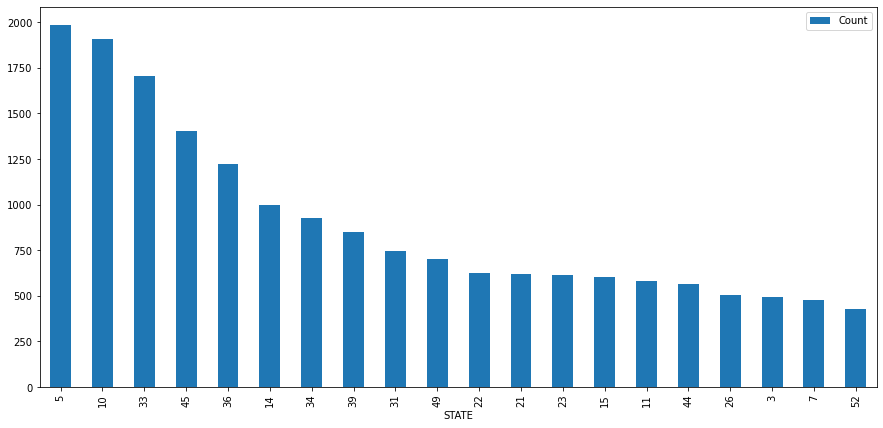

In [72]:
Train_F_Beneficiary_grouped1.plot(x ='STATE', y='Count', kind = 'bar', figsize= (15,7));

### Average Age for the data set and as a comparison for the probable fradulent activites applied on what age range

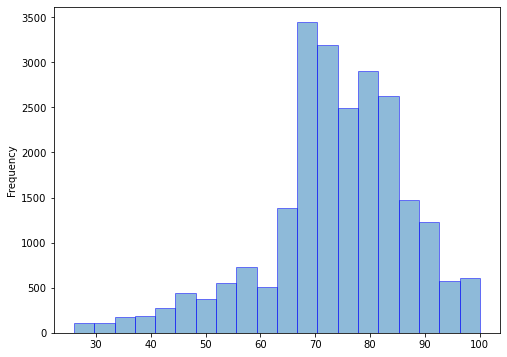

In [73]:
fraud_beneficiary_ip_op_df['DOB'] =  pd.to_datetime(fraud_beneficiary_ip_op_df['DOB'], format='%Y-%m-%d')  
now = pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') # Assuming this is 2009 data as the last recorded death is for 2009
fraud_beneficiary_ip_op_df['DOB'] = fraud_beneficiary_ip_op_df['DOB'].where(fraud_beneficiary_ip_op_df['DOB'] < now) 
fraud_beneficiary_ip_op_df['age'] = (now - fraud_beneficiary_ip_op_df['DOB']).astype('<m8[Y]')  
ax = fraud_beneficiary_ip_op_df['age'].plot.hist(bins=20, alpha=0.5, figsize=(8, 6), edgecolor='b')

This seems logical as most of the patients are of an age >65

### Inpatient data as a whole not just the fradulent activities

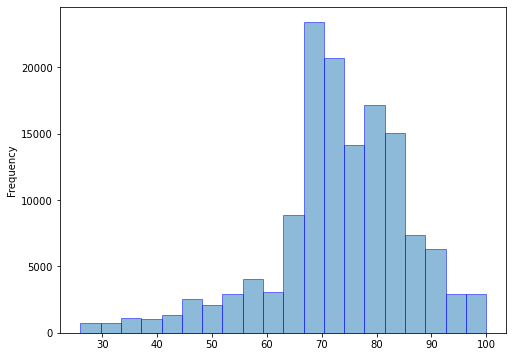

In [74]:
beneficiary['DOB'] =  pd.to_datetime(beneficiary['DOB'], format='%Y-%m-%d')  
now = pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') # Assuming this is 2009 data as the last recorded death is for 2009
beneficiary['DOB'] = beneficiary['DOB'].where(beneficiary['DOB'] < now)
beneficiary['age'] = (now - beneficiary['DOB']).astype('<m8[Y]')
ax = beneficiary['age'].plot.hist(bins=20, alpha=0.5, figsize=(8, 6), edgecolor='b')

Here too we see a similar pattern

### What is the average cost of potential fraud claims and also what is the cost as % of whole. Checking the outliers for such claims

### Inpatient

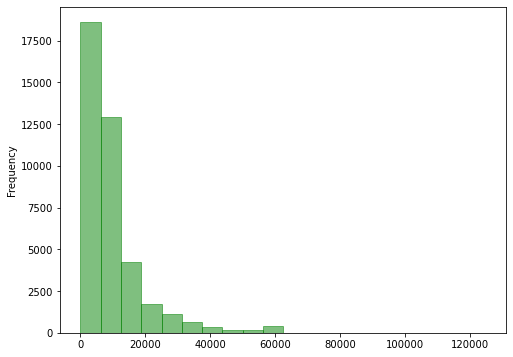

In [75]:
ax = inpatient['InscClaimAmtReimbursed'].plot.hist(bins=20, alpha=0.5, figsize=(8, 6), facecolor='g', edgecolor='g')
# Insurance Claim amount reimbursed.

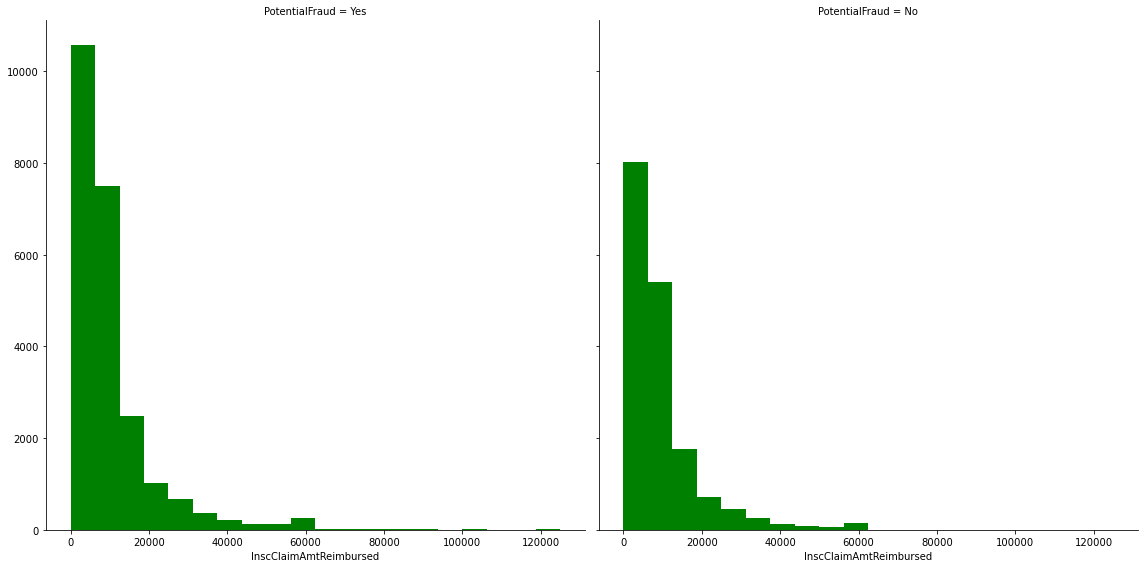

In [76]:
import seaborn as sns
inpatient_1 = pd.merge(inpatient, train, how='inner', on='Provider')
g = sns.FacetGrid(inpatient_1, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, color = 'g')

We see that it is a significantly large amount which might be fradulent.

In [77]:
inpatient_1 = inpatient_1.loc[(inpatient_1['PotentialFraud'] == 'Yes')]
Total = inpatient_1['InscClaimAmtReimbursed'].sum()
print(Total)

241288510


241288510 - around 240 Million dollars worth of claim might have some fradulent activity. Even if we assume that it has just 10% fradulent activity the amount will be quite huge

### Outpatient

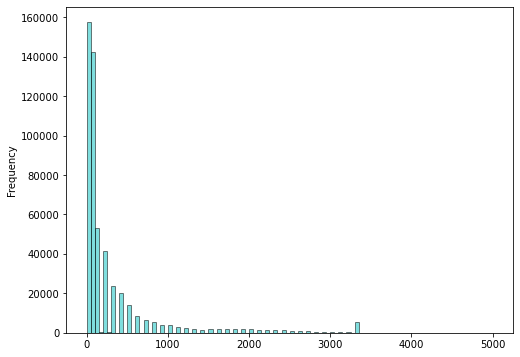

In [78]:
ax = outpatient['InscClaimAmtReimbursed'].plot.hist(bins=100,range=[0,5000], alpha=0.5, figsize=(8, 6), facecolor='c', edgecolor='k')

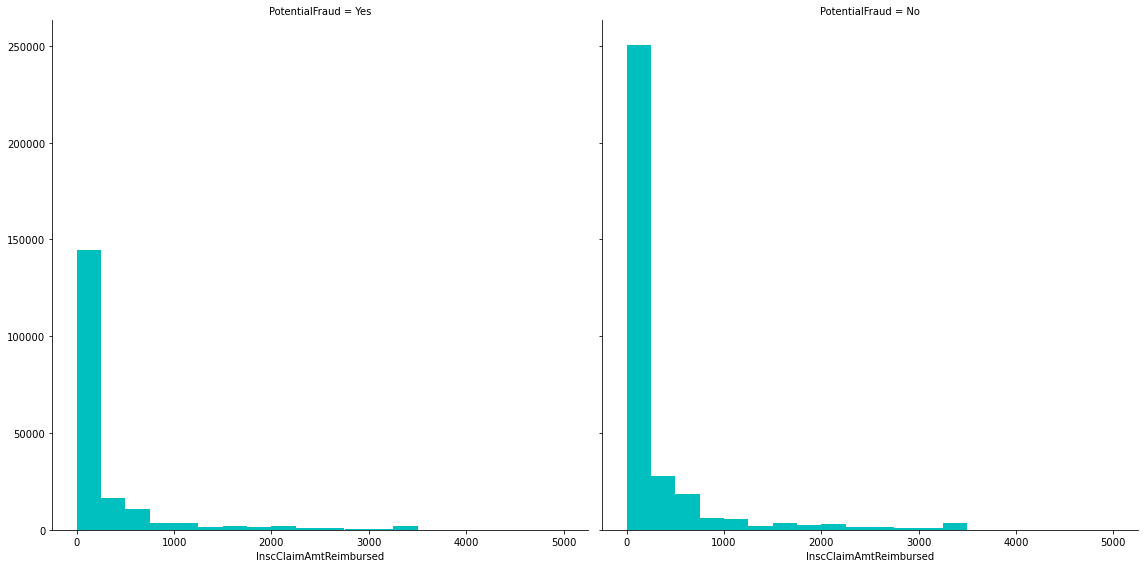

In [79]:
outpatient_1 = pd.merge(outpatient, train, how='inner', on='Provider')
g = sns.FacetGrid(outpatient_1, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, range=[0, 5000], color ='c')

### Checking for missing values in the data set

In [80]:
beneficiary.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

Only the date of death is empty - makes sense for the people who are alive

### Adding Age Column

In [81]:
beneficiary['DOB'] = pd.to_datetime(beneficiary['DOB'] , format = '%Y-%m-%d')
beneficiary['DOD'] = pd.to_datetime(beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')
beneficiary['Age'] = round(((beneficiary['DOD'] - beneficiary['DOB']).dt.days)/365)

## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.

In [82]:
beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - beneficiary['DOB']).dt.days)/365),
                                 inplace=True)

In [83]:
beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,age,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,2,1,1,36000,3204,60,70,66.0,67.0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,2,2,2,2,0,0,30,50,73.0,73.0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,1,2,2,2,0,0,90,40,73.0,73.0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,2,0,0,1810,760,87.0,87.0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,2,2,2,2,0,0,1790,1200,74.0,74.0


In [84]:
## Creating the master DF
inpatient['EncounterType'] = 0
outpatient['EncounterType'] = 1
frames = [inpatient, outpatient]
TrainInAndOut = pd.concat(frames)
TrainInAndOutBenf = pd.merge(TrainInAndOut, beneficiary, how='inner', on='BeneID')
Master_df = pd.merge(TrainInAndOutBenf, train, how='inner', on='Provider')

In [85]:
Master_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,age,Age,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2,1,1,36000,3204,60,70,66.0,67.0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,2,2,2,24000,2136,450,200,77.0,78.0,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,2,2,19000,1068,100,20,96.0,96.0,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,2,2,17000,1068,1050,540,87.0,87.0,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,2,27000,2136,450,160,79.0,79.0,Yes


In [86]:
Master_df['PotentialFraud'].value_counts()

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64

In [87]:
Master_df.shape

(558211, 58)

In [88]:
Master_df.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [89]:
## removing the column DOD and DOB also creating a new column IsDead as we already have the age we do not need date of death and date of birth 

Master_df.loc[Master_df['DOD'].isnull(), 'IsDead'] = '0'
Master_df.loc[(Master_df['DOD'].notnull()), 'IsDead'] = '1'
Master_df = Master_df.drop(['DOD'], axis = 1)
Master_df = Master_df.drop(['DOB'], axis = 1)

In [90]:
Master_df = Master_df.drop(['age'], axis = 1) 

Calculating the number of days the patient was admitted to the dospital and removing admission and discharge date, For outpatients as they do not get admitted will put number of days admitted = 0

In [91]:
Master_df['AdmissionDt'] = pd.to_datetime(Master_df['AdmissionDt'] , format = '%Y-%m-%d')
Master_df['DischargeDt'] = pd.to_datetime(Master_df['DischargeDt'],format = '%Y-%m-%d')
Master_df['DaysAdmitted'] = ((Master_df['DischargeDt'] - Master_df['AdmissionDt']).dt.days)+1
Master_df.loc[Master_df['EncounterType'] == 1, 'DaysAdmitted'] = '0'
Master_df[['EncounterType','DaysAdmitted','DischargeDt','AdmissionDt']].head()
Master_df = Master_df.drop(['DischargeDt'], axis = 1)
Master_df = Master_df.drop(['AdmissionDt'], axis = 1)

In [92]:
Master_df.loc[Master_df['DeductibleAmtPaid'].isnull(), 'DeductibleAmtPaid'] = '0'

In [93]:
cols= ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6']

In [94]:
Master_df[cols]= Master_df[cols].replace({np.nan:0})
Master_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud,IsDead,DaysAdmitted
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,1,1,36000,3204,60,70,67.0,Yes,0,7.0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,0,...,2,2,24000,2136,450,200,78.0,Yes,0,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,2,2,19000,1068,100,20,96.0,Yes,0,13.0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,...,2,2,17000,1068,1050,540,87.0,Yes,0,19.0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,1,2,27000,2136,450,160,79.0,Yes,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,0,...,2,2,0,0,890,120,85.0,No,0,0
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238,NaN,99639,...,1,2,0,0,4400,220,83.0,No,0,0
558208,BENE157378,CLM460770,2009-07-09,2009-07-29,PRV51577,2100,PHY338096,NaN,NaN,0,...,2,2,0,0,14240,2810,64.0,No,0,0
558209,BENE158295,CLM306999,2009-04-16,2009-04-16,PRV53083,10,PHY416646,NaN,NaN,0,...,1,2,0,0,640,350,85.0,No,0,0


In [95]:
for i in cols:
    Master_df[i][Master_df[i]!=0]= 1

C:\Users\302201\AppData\Local\Temp/ipykernel_5172/1718562570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Master_df[i][Master_df[i]!=0]= 1


In [96]:
Master_df[cols]= Master_df[cols].astype(float)

In [97]:
Master_df['TotalDiagnosis']= Master_df['ClmDiagnosisCode_1']+Master_df['ClmDiagnosisCode_10']+Master_df['ClmDiagnosisCode_2']+ Master_df['ClmDiagnosisCode_3']+ Master_df['ClmDiagnosisCode_4']+Master_df['ClmDiagnosisCode_5']+ Master_df['ClmDiagnosisCode_6']+ Master_df['ClmDiagnosisCode_7']+Master_df['ClmDiagnosisCode_8']+ Master_df['ClmDiagnosisCode_9']

In [98]:
Master_df['TotalProcedure']= Master_df['ClmProcedureCode_1']+Master_df['ClmProcedureCode_2']+Master_df['ClmProcedureCode_3']+ Master_df['ClmProcedureCode_4']+ Master_df['ClmProcedureCode_5']+Master_df['ClmProcedureCode_6']

Removing coulmns which are not necessary

In [99]:
Master_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'EncounterType', 'Gender',
       'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_I

In [100]:
remove=['Provider','BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode','DeductibleAmtPaid','NoOfMonths_PartACov',
        'NoOfMonths_PartBCov','DiagnosisGroupCode',
        'State', 'County']

In [101]:
Master_df.drop(columns=remove, axis=1, inplace=True)

In [102]:
Master_df.head()

,InscClaimAmtReimbursed,EncounterType,Gender,Race,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud,IsDead,DaysAdmitted,TotalDiagnosis,TotalProcedure
0,26000,0,1,1,0,1,2,1,2,2,...,36000,3204,60,70,67.0,Yes,0,7.0,9.0,0.0
1,50,1,1,1,0,1,1,1,2,2,...,24000,2136,450,200,78.0,Yes,0,0,9.0,0.0
2,19000,0,2,1,0,1,1,1,2,1,...,19000,1068,100,20,96.0,Yes,0,13.0,9.0,2.0
3,17000,0,1,1,0,2,2,2,2,2,...,17000,1068,1050,540,87.0,Yes,0,19.0,9.0,1.0
4,13000,0,2,1,0,2,1,2,2,1,...,27000,2136,450,160,79.0,Yes,0,5.0,7.0,1.0


In [103]:
Master_df.shape

(558211, 26)

In [104]:
Master_df['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [105]:
Master_df['RenalDiseaseIndicator']= Master_df['RenalDiseaseIndicator'].replace({'Y':1,'0':0})

In [106]:
Master_df['RenalDiseaseIndicator']=Master_df['RenalDiseaseIndicator'].astype(int)

In [107]:
Master_df.describe(include='O')

,PotentialFraud,IsDead,DaysAdmitted
count,558211,558211,558211
unique,2,2,37
top,No,0,0
freq,345415,554080,517737


In [108]:
Master_df['IsDead']=Master_df['IsDead'].astype(float)
Master_df['DaysAdmitted']=Master_df['DaysAdmitted'].astype(float)

In [109]:
Master_df['PotentialFraud']=Master_df['PotentialFraud'].replace({'Yes':1, 'No':0})

In [110]:
 Master_df['PotentialFraud']=Master_df['PotentialFraud'].astype(int)

In [111]:
Master_df['PotentialFraud']

0         1
1         1
2         1
3         1
4         1
         ..
558206    0
558207    0
558208    0
558209    0
558210    0
Name: PotentialFraud, Length: 558211, dtype: int32

In [2]:
df_5 = Master_df.sample(frac = 0.05)
 
# Creating dataframe with
# rest of the 95% values
df_95 = Master_df.drop(df_5.index)

NameError: name 'Master_df' is not defined

In [113]:
x= df_95.drop('PotentialFraud', axis=1)
y= df_95.loc[:,'PotentialFraud']

NameError: name 'df_5' is not defined

In [ ]:
'''num_col= ['InscClaimAmtReimbursed',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'DaysAdmitted', 'TotalDiagnosis', 'TotalProcedure']

In [ ]:
'''numerical_columns= x.loc[:,num_col]
numerical_columns.describe()

In [ ]:
'''numerical_columns.head()

In [ ]:
'''cat_col= ['EncounterType', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke','IsDead']

In [ ]:
'''x_cat= x.loc[:,cat_col]
x_cat

In [115]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale= StandardScaler()
x_num= scale.fit_transform(x[num_col])

In [ ]:
x_num= pd.DataFrame(x_num, columns=['InscClaimAmtReimbursed','IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt','OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age','DaysAdmitted', 'TotalDiagnosis', 'TotalProcedure'])

In [ ]:
x= pd.concat([x_num, x_cat], axis=1)
x

In [116]:
x.columns

Index(['InscClaimAmtReimbursed', 'EncounterType', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'IsDead',
       'DaysAdmitted', 'TotalDiagnosis', 'TotalProcedure'],
      dtype='object')

# Train- Test Split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.1, random_state=42)

In [119]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_train1,y_train1 = rus.fit_resample(x_train, y_train)

In [120]:
x_train1.to_csv("x_train.csv")

In [121]:
'''from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
x_train2, y_train2 = ada.fit_resample(x_train, y_train)'''

'from imblearn import over_sampling\n\nada = over_sampling.ADASYN(random_state=0)\nx_train2, y_train2 = ada.fit_resample(x_train, y_train)'

In [122]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc, roc_curve

C:\Users\302201\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:02:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

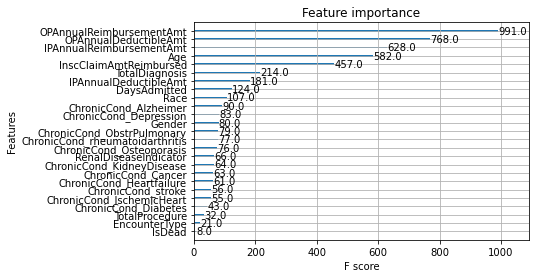

In [123]:
from xgboost import plot_importance
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
plot_importance(xgb)

[21:03:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

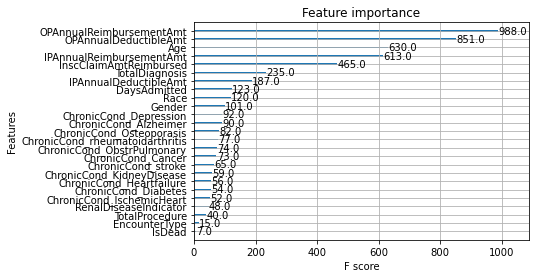

In [124]:
xgb= XGBClassifier()
xgb.fit(x_train1,y_train1)
plot_importance(xgb)

In [125]:
import pickle

pickle.dump(xgb,open("xgb_classifier.pkl",'wb'))

In [143]:
pickle.dump(xgb,open("xgb_classifier.pkl",'wb'))

model = pickle.load(open('xgb_classifier.pkl','rb'))

predictions = model.predict(x_unseen)

predict_df=pd.DataFrame(predictions)

In [144]:
predict_df

,0
0,0
1,1
2,0
3,0
4,1
...,...
27906,1
27907,1
27908,1
27909,0


In [145]:
x_unseen=x_unseen

### Decision Tree

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
estimator=  DecisionTreeClassifier()
param_grid= {'criterion':['gini', 'entropy'],
             'max_depth':[3,4,5],
             'min_samples_split':[2,3,5]
             }
grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid)
grid_search.fit(x_train1, y_train1)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.5362305332845685
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}


In [148]:
'''param_grid= {'criterion':['gini', 'entropy'],
             'max_depth':[3,4,5],
             'min_samples_split':[2,3,5]
             }
grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid)
grid_search.fit(x_train2, y_train2)
print(grid_search.best_score_)
print(grid_search.best_params_)'''

"param_grid= {'criterion':['gini', 'entropy'],\n             'max_depth':[3,4,5],\n             'min_samples_split':[2,3,5]\n             }\ngrid_search = GridSearchCV(estimator = estimator, param_grid = param_grid)\ngrid_search.fit(x_train2, y_train2)\nprint(grid_search.best_score_)\nprint(grid_search.best_params_)"

In [128]:
grid_search.fit(x_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.630368554486978
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [129]:
pickle.dump(grid_search,open("decision_tree_classifier.pkl",'wb'))

### Logistic regression

In [137]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train1, y_train1)
model_score= lr.predict(x_train1)
accuracy= lr.predict(x_test)
print(accuracy_score(y_train1, model_score))
print(accuracy_score(y_test, accuracy))

0.5253097072757851
0.595662832359042


In [1]:
pickle.dump(lr,open("logistic_regression.pkl",'wb'))

NameError: name 'pickle' is not defined

### Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
estimator1= RandomForestClassifier()
estimator1.fit(x_train, y_train)
model_score= estimator1.predict(x_train)
accuracy= estimator1.predict(x_test)
print(accuracy_score(y_train, model_score))
print(accuracy_score(y_test, accuracy))

0.9918033817336099
0.6968131246464265


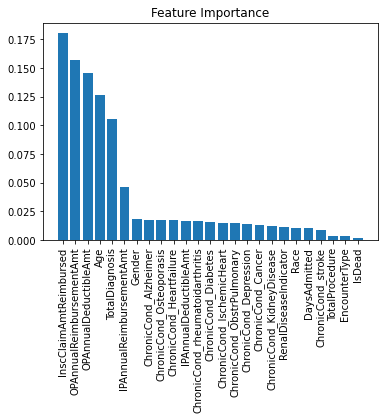

<Figure size 1440x360 with 0 Axes>

In [131]:
importances = estimator1.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

import matplotlib.pyplot as plt

fig2, ax2 = plt.subplots()
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
#plt.tight_layout()
fig2 =plt.figure(figsize=(20,5))
plt.show()

In [132]:
import lime
import lime.lime_tabular

predict_fn_rf = lambda x: estimator1.predict_proba(x).astype(float)
X = x_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = x_train.columns,class_names=['True claim','False claim'],kernel_width=5)

In [133]:
x_test

,InscClaimAmtReimbursed,EncounterType,Gender,Race,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,DaysAdmitted,TotalDiagnosis,TotalProcedure
176067,200,1,2,1,0,1,1,1,2,2,...,2,0,0,270,20,101.0,0.0,0.0,3.0,0.0
239243,10,1,1,1,1,1,1,1,2,2,...,2,0,0,3940,520,54.0,0.0,0.0,1.0,0.0
233032,300,1,2,1,0,1,1,2,2,2,...,2,8000,1068,3340,380,72.0,0.0,0.0,1.0,0.0
533034,200,1,1,1,0,1,2,1,2,2,...,2,0,0,2010,430,81.0,0.0,0.0,1.0,0.0
330375,20,1,2,1,1,1,1,1,2,2,...,2,0,0,3270,50,84.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461661,400,1,2,1,0,2,1,1,2,1,...,2,0,0,900,300,86.0,0.0,0.0,2.0,0.0
281000,70,1,2,2,0,2,1,2,2,2,...,2,0,0,420,50,63.0,0.0,0.0,3.0,0.0
446396,1900,1,2,1,1,2,1,1,2,1,...,2,0,0,30920,8070,52.0,0.0,0.0,4.0,0.0
515491,500,1,1,1,0,1,1,1,1,1,...,2,0,0,3070,840,88.0,0.0,0.0,6.0,0.0


In [134]:
x_test.loc[[]]

,InscClaimAmtReimbursed,EncounterType,Gender,Race,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,IsDead,DaysAdmitted,TotalDiagnosis,TotalProcedure


In [135]:
list = x_test.index

In [136]:
choosen_instance = x_test.loc[[176218]].values[0]
choosen_instance

KeyError: "None of [Int64Index([176218], dtype='int64')] are in the [index]"

In [ ]:

exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

In [ ]:
df= exp.show_in_notebook(show_all=False)

In [ ]:
accuracy[accuracy==1].sum()

In [ ]:
len(accuracy)

In [138]:
pickle.dump(estimator1,open("rf_classifier.pkl",'wb'))


In [ ]:
pickle.dump(estimator1,open("rf_classifier.pkl",'wb'))

model = pickle.load(open('rf_classifier.pkl','rb'))

predictions = model.predict(x_unseen)

predict_df=pd.DataFrame(predictions)

In [152]:
from joblib import dump, load
dump(estimator1, 'rf_classifier.joblib') 

['rf_classifier.joblib']

In [175]:
accuracy = estimator1.predict(x_unseen)

In [ ]:
#for dt 
dt_predict_df=pd.DataFrame(accuracy)

In [ ]:
df_pred_comb = x_unseen.reset_index(drop=True)
df_pred_comb

In [ ]:
df_predicted_combined = pd.concat([df_pred_comb, dt_predict_df],axis=1)
df_predicted_combined

In [ ]:
df_predicted_combined.rename(columns ={0 : 'pred'}, inplace=True)

In [ ]:
df_predicted_combined[df_predicted_combined["InscClaimAmtReimbursed"]>5000]

In [ ]:
choosen_instance = df_predicted_combined.loc[[10]].values[0]


In [ ]:
choosen_instance[:-1]

In [ ]:
exp = explainer.explain_instance(choosen_instance[:-1], predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

In [ ]:
df_predicted_combined["pred"].value_counts()

In [ ]:
df_predicted_combined.describe()

In [ ]:
fig, ax = plt.subplots()

sns.catplot("EncounterType", hue="pred", data=df_predicted_combined, kind="count", 
            palette={1:"blue", 0:"green"}, ax=ax)

In [ ]:
import matplotlib.pyplot as plt

df_predicted_combined.groupby(['InscClaimAmtReimbursed','pred']).sum().plot(kind='bar')

In [ ]:
pred_true = df_predicted_combined[df_predicted_combined["pred"] ==1]

In [ ]:
pred_true

In [162]:
from pandas_profiling import ProfileReport as pp

In [163]:
pred_true.to_csv("true_predictions.csv")
df_predicted_combined.to_csv("all_predictions.csv")

# hold

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes= GaussianNB()
bayes.fit(x_train, y_train)
train_pred= bayes.predict(x_train)
test_pred= bayes.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

In [ ]:
bayes.fit(x_train, y_train)
train_pred= bayes.predict(x_train1)
test_pred= bayes.predict(x_test)
print(accuracy_score(y_train1,train_pred))
print(accuracy_score(y_test,test_pred))

In [ ]:
'''bayes.fit(x_train, y_train)
train_pred= bayes.predict(x_train2)
test_pred= bayes.predict(x_test)
print(accuracy_score(y_train2,train_pred))
print(accuracy_score(y_test,test_pred))'''

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)
train_pred= lr.predict(x_train)
test_pred= lr.predict(x_test)
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

In [ ]:
lr.fit(x_train1, y_train1)
train_pred= lr.predict(x_train1)
test_pred= lr.predict(x_test)
print(accuracy_score(y_train1,train_pred))
print(accuracy_score(y_test,test_pred))

In [ ]:
'''lr.fit(x_train2, y_train2)
train_pred= lr.predict(x_train2)
test_pred= lr.predict(x_test)
print(accuracy_score(y_train2,train_pred))
print(accuracy_score(y_test,test_pred))'''

### After Evaluation of Various parameters

### Decision Tree

In [ ]:
import time
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
estimator=  DecisionTreeClassifier(criterion= 'gini', max_depth=5, min_samples_split= 2)
estimator.fit(x_train, y_train)
model_score= estimator.predict(x_train)
accuracy= estimator.predict(x_test)
start = time.time()
estimator.score(x_train, y_train)
acc_random_forest = round(accuracy_score(y_test,accuracy)*100, 2)
f1_random_forest = round(f1_score(y_test,accuracy,average = "binary")*100, 2)
f_beta_random_forest = round(fbeta_score(y_test,accuracy,average = "binary",beta=0.5)*100, 2)

end = time.time()

acc_score.append({'Model':'Decision Tree', 'Score': accuracy_score(y_train, model_score), 'Accuracy': accuracy_score(y_test, accuracy), 'Time_Taken':end - start})

In [ ]:
fn= ['InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt',
    'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
    'OPAnnualDeductibleAmt', 'Age', 'DaysAdmitted',
    'TotalDiagnosis', 'TotalProcedure', 'EncounterType', 'Gender', 'Race',
    'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
    'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
    'ChronicCond_Depression', 'ChronicCond_Diabetes',
    'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IsDead']

In [ ]:
cl=['No','Yes']

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(estimator, feature_names= fn, class_names=cl);

### Destandardizing Values

In [ ]:
m1= Master_df['DaysAdmitted'].mean()
s1= Master_df['DaysAdmitted'].std()
print((0.007*s1)+m1)
print((9.57*s1)+m1)
print((9.135*s1)+m1)

In [ ]:
m2= Master_df['OPAnnualDeductibleAmt'].mean()
s2= Master_df['OPAnnualDeductibleAmt'].std()
print((10.514*s2)+m2)

In [ ]:
m3= Master_df['Age'].mean()
s3= Master_df['Age'].std()
print((-0.481*s3)+m3)

In [ ]:
m4= Master_df['InscClaimAmtReimbursed'].mean()
s4= Master_df['InscClaimAmtReimbursed'].std()
print((10.075*s4)+m4)

In [ ]:
confusion_matrix(y_test,accuracy)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,accuracy).ravel()
(tn, fp, fn, tp)  

In [ ]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, estimator.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, estimator.predict_proba(x_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimator1= RandomForestClassifier()
estimator1.fit(x_train, y_train)
model_score= estimator1.predict(x_train)
accuracy= estimator1.predict(x_test)
start = time.time()
estimator1.score(x_train, y_train)
acc_random_forest = round(accuracy_score(y_test,accuracy)*100, 2)
f1_random_forest = round(f1_score(y_test,accuracy,average = "binary")*100, 2)
f_beta_random_forest = round(fbeta_score(y_test,accuracy,average = "binary",beta=0.5)*100, 2)
end = time.time()
acc_score.append({'Model':'Random Forest', 'Score': accuracy_score(y_train, model_score), 'Accuracy': accuracy_score(y_test, accuracy),'Time_Taken':end - start})

In [ ]:
confusion_matrix(y_test,accuracy)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,accuracy).ravel()
(tn, fp, fn, tp)

In [ ]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, estimator1.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, estimator1.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()

In [ ]:
y_test_rf= y_test.reset_index()
y_test.head()

In [ ]:
x_test_rf=  x_test.reset_index()
x_test.head()

In [ ]:
y_test_rf.shape

In [ ]:
accuracy= accuracy.reshape(55822,1)

In [ ]:
accuracy.shape

In [ ]:
accuracy= pd.DataFrame(accuracy, columns= ['Predict'])
accuracy

In [ ]:
predictor= pd.concat([y_test_rf,accuracy], axis=1)
predictor

In [ ]:
Index_label = predictor[(predictor['PotentialFraud'] ==1) & (predictor['Predict']==1)]
indicies= Index_label['index']

In [ ]:
Index_label

In [ ]:
wrong_predictions= Master_df.iloc[indicies,:]
wrong_predictions

In [ ]:
print('Fraud Insurance Claims detected - ',wrong_predictions['InscClaimAmtReimbursed'].sum())
print('Fraud Insurance Claims for Inpatients detected - ',wrong_predictions['IPAnnualReimbursementAmt'].sum())
print('Fraud Insurance Claims for Outpatients detected - ',wrong_predictions['OPAnnualReimbursementAmt'].sum())

In [ ]:
fraud_index= y_test_rf[y_test_rf['PotentialFraud']==1]
indicies1= fraud_index['index']

In [ ]:
frauds= Master_df.iloc[indicies1,:]
frauds

In [ ]:
print('Fraud Insurance Claims without model - ',frauds['InscClaimAmtReimbursed'].sum())
print('Fraud Insurance Claims for Inpatients without model - ',frauds['IPAnnualReimbursementAmt'].sum())
print('Fraud Insurance Claims for Outpatients without model - ',frauds['OPAnnualReimbursementAmt'].sum())

In [ ]:
print('Insurance Claim Amount Saved - $', 30673230- 23525520)
print('Inpatient Insurance Claim Amount Saved - $',122946970- 78254980)
print('Outpatient insurance Claim Amount Saved - $',48642580- 27754480)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes= GaussianNB()
bayes.fit(x_train, y_train)
train_pred= bayes.predict(x_train)
test_pred= bayes.predict(x_test)
start = time.time()
bayes.score(x_train, y_train)
acc_random_forest = round(accuracy_score(y_test,test_pred)*100, 2)
f1_random_forest = round(f1_score(y_test,test_pred,average = "binary")*100, 2)
f_beta_random_forest = round(fbeta_score(y_test,test_pred,average = "binary",beta=0.5)*100, 2)

end = time.time()

acc_score.append({'Model':'Naive Bayes', 'Score': accuracy_score(y_train, train_pred), 'Accuracy': accuracy_score(y_test, test_pred),'Time_Taken':end- start})

In [ ]:
confusion_matrix(y_test,test_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,test_pred).ravel()
(tn, fp, fn, tp)

In [ ]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, bayes.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, bayes.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)
train_pred= lr.predict(x_train)
test_pred= lr.predict(x_test)
start = time.time()
lr.score(x_train, y_train)
acc_random_forest = round(accuracy_score(y_test,test_pred)*100, 2)
f1_random_forest = round(f1_score(y_test,test_pred,average = "binary")*100, 2)
f_beta_random_forest = round(fbeta_score(y_test,test_pred,average = "binary",beta=0.5)*100, 2)

end = time.time()
acc_score.append({'Model': "Logistic Regression", 'Score': accuracy_score(y_train,train_pred), 'Accuracy': accuracy_score(y_test,test_pred), 'Time_Taken':end - start})

In [ ]:
confusion_matrix(y_test,test_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,test_pred).ravel()
(tn, fp, fn, tp)

In [ ]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, lr.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()

### XG Boost

In [ ]:
xgb= XGBClassifier()
xgb.fit(x_train, y_train)
model_score= xgb.predict(x_train)
accuracy= xgb.predict(x_test)
start = time.time()
xgb.score(x_train, y_train)
acc_random_forest = round(accuracy_score(y_test,accuracy)*100, 2)
f1_random_forest = round(f1_score(y_test,accuracy,average = "binary")*100, 2)
f_beta_random_forest = round(fbeta_score(y_test,accuracy,average = "binary",beta=0.5)*100, 2)

end = time.time()
acc_score.append({'Model':'XG boost', 'Score': accuracy_score(y_train, model_score), 'Accuracy': accuracy_score(y_test, accuracy), 'Time_Taken':end - start})

In [ ]:
confusion_matrix(y_test,accuracy)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,accuracy).ravel()
(tn, fp, fn, tp)

In [ ]:
train_fpr, train_tpr, thresholds = roc_curve(y_train, xgb.predict_proba(x_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.show()

In [ ]:
accuracy= pd.DataFrame(acc_score, columns=['Model','Score','Accuracy','Time_Taken'])
accuracy.sort_values(by='Accuracy', ascending= False, inplace= True)
accuracy

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x= accuracy.Model, y=accuracy.Accuracy);

In [ ]:
import pickle

In [ ]:
pickle.dump(estimator1, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

In [ ]:
print(model.predict([[6.542662,2.610838,2.234826,-0.571436,-0.578530,-0.519851,2.832646,2.446318,-0.190910,0,1,1,0,1,1,1,2,2,1,1,1,2,1,1,0.0]]))